<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EE25737:-Introduction-to-Machine-Learning" data-toc-modified-id="EE25737:-Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="black">EE25737: Introduction to Machine Learning</font></a></span><ul class="toc-item"><li><span><a href="#Implementation-of-some-algorithms-by-NumPy/SciPy" data-toc-modified-id="Implementation-of-some-algorithms-by-NumPy/SciPy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation of some algorithms by NumPy/SciPy</a></span><ul class="toc-item"><li><span><a href="#[your-name]" data-toc-modified-id="[your-name]-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>[your name]</a></span></li><li><span><a href="#[your-ID]" data-toc-modified-id="[your-ID]-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>[your ID]</a></span></li></ul></li><li><span><a href="#2.-Logistic-regression" data-toc-modified-id="2.-Logistic-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Logistic regression</a></span></li><li><span><a href="#3.-Online-Linear-Regression" data-toc-modified-id="3.-Online-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Online Linear Regression</a></span></li></ul></li></ul></div>

# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### Mohammad Zangooeoi
### 95101593

In this assignment, you will implement some learning algorithms only using Linalg and without using scikit-learn.


###### Load data


## 2. Logistic regression

Import data with pandas library.
Print the first five row of the data. There are 14 column in dataset. The first 12 are features and the quality column is the label.

In [423]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats
warnings.filterwarnings("ignore")

In [395]:
# load dataset 
dataset_original_df = pd.read_csv('JuiceQuality.csv')
dataset_df = dataset_original_df.copy()

# quantitication!
dataset_df['quality'] = dataset_df['quality'].map({'low':0, 'high':1})
dataset_df['residual sugar'] = dataset_df['residual sugar'].map({'very_low':-2, 'low':-1, 'medium':0, 'high':1, 'very_high':2})
dataset_df['sulphates'] = dataset_df['sulphates'].map({'low':-1, 'medium':0, 'high':1, 'very_high':2})
dataset_df['Vit Indx'] = dataset_df['Vit Indx'].map({'very_low':-2, 'low':-1, 'medium':0, 'high':1, 'very_high':2})
dataset_df['Type'] = dataset_df['Type'].map({'Lemon_Juice':0, 'Orange_Juice':1})

# X= ::
x = dataset_df.iloc[:, 1:13]

# y= ::
y = dataset_df['quality']

dataset_original_df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,sulphates,Vit Indx,quality,Type
0,0,5.9,0.32,0.39,low,0.114,24.0,140.0,13.905151,0.99340,3.09,low,very_low,high,Lemon_Juice
1,1,7.8,0.24,0.18,high,0.046,33.0,160.0,17.130070,0.99630,3.20,medium,low,high,Lemon_Juice
2,2,7.7,0.58,0.01,very_low,0.088,12.0,18.0,15.618966,0.99568,NaN,medium,low,high,Orange_Juice
3,3,8.3,0.18,0.30,very_low,0.033,20.0,57.0,18.085322,0.99109,3.02,medium,medium,high,Lemon_Juice
4,4,6.5,NaN,0.31,very_low,0.044,NaN,127.0,13.968160,0.99280,3.49,low,low,high,Lemon_Juice


In this section, you need to prepare your data. One of the problems you may face in datasets are missing values. There are various strategies to treat missing values. First, you can delete any sample with missing values. Another method is to fill missing values with mean of the feature. 

In [396]:
# delete any sample with a missing value 
dataset_df2 = dataset_df.copy()
dataset_df2.dropna(inplace=True)
# X1= ::
x1 = dataset_df2.iloc[:, 1:13]
# y1= ::
y1 = dataset_df2['quality']
# replace missing values with mean of the features for both X and y 
# X2= ::
x2 = x.fillna(x.mean())
# y2= ::
y2 = y.fillna(x.mean()) # since 'high' is more common than 'low'

Implement the Logistic regression algorithm. You can change everything in the cell below.

In [397]:
class LogisticRegression:
    
    def __init__(self, lr=10, num_iter=1000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def probability(self, theta, x):
        return self.sigmoid(np.dot(theta, x.T))

    def gradient(self, theta, x, y):
        m = x.shape[0]
        return (1 / m) * np.dot(self.probability(theta, x) - y, x)
    
    def update_weights(self, x, y, theta):
        return theta - self.lr * self.gradient(theta, x, y)

    def cost_function(self, theta, x, y):
        m = x.shape[0]
        return -(1/m) * (np.dot(y, np.log(self.probability(theta, x))) + np.dot((1 - y), np.log(1 - self.probability(theta, x))))

    def fit(self, x, y):
        # Handle interception
        if self.fit_intercept:
            theta = np.zeros(x.shape[1] + 1)
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        else:
            theta = np.zeros(x.shape[1])
        # Some variables to hold metadata
        cost = np.zeros(self.num_iter)
        false = np.zeros(self.num_iter)
        # Steps of claculation
        for i in range(self.num_iter):
            theta = self.update_weights(x, y, theta)
            cost[i] = self.cost_function(theta, x, y)
            if self.verbose:
                if i % 10000 == 0:
                    print("Cost func at iter #{}: {}".format(i, cost[i]))
            y_predict = [1 if item > 0.5 else 0 for item in self.probability(theta, x)]
            false[i] = np.shape(np.where(y_predict!=y))[1] / len(y)
        if self.verbose:
            print("The model has been trained successfully!")
        self.theta = theta
        return theta, cost, false
        
    def predict_prob(self, x):
        if self.fit_intercept:
            x = np.hstack((np.ones(1), x))
        return probability(self.theta, x)
      
    def predict(self, x):
        if predict_prob(x) >= 0.5:
            return 1
        else:
            return 0

#### REPORT -------------------------------
- Why do not we use MSE in logistic regression?
This is because MSE here is not convex; consequently, gradient descent cannot lead to optimal minimum.
#### ---------------------------------------------


Note that you should plot the dataset alongside the seprator line generated by Logistic regression using the first two features in both dataset generated after missing values treatment and for different learning rates. Also report accuracy for classification using all features for different learning rates, lr= {0.01, 0.1, 1, 10}.

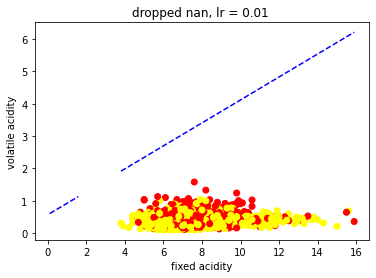

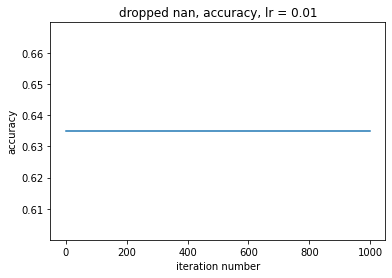

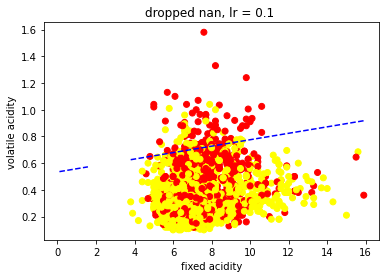

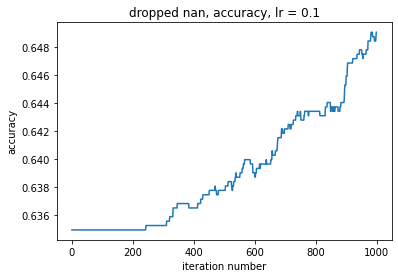

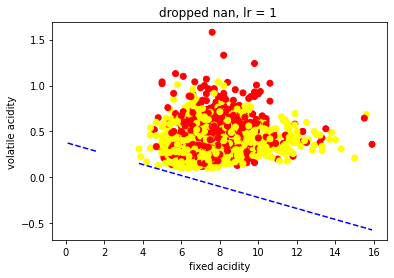

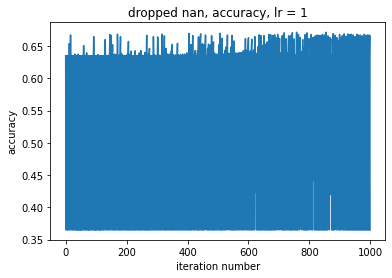

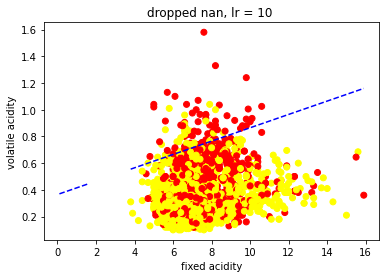

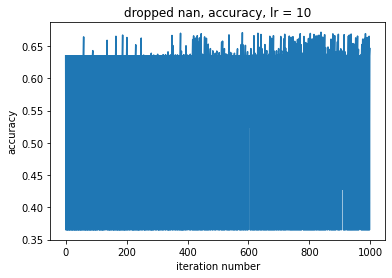

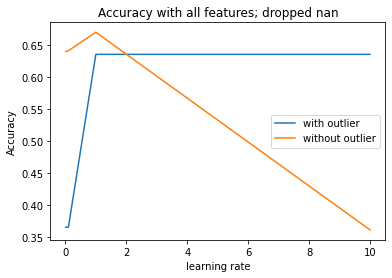

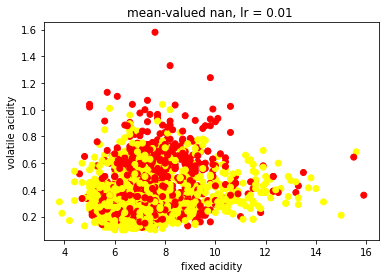

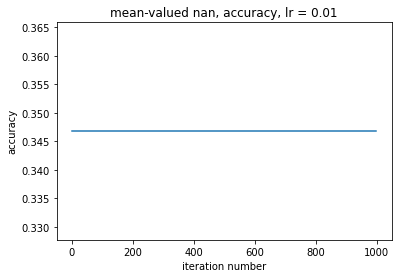

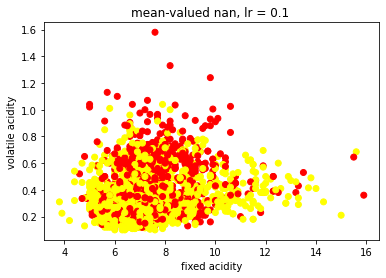

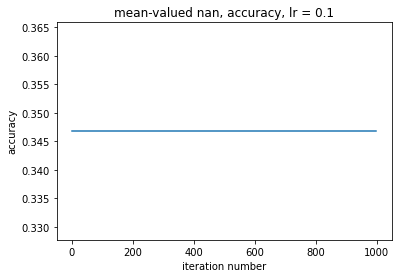

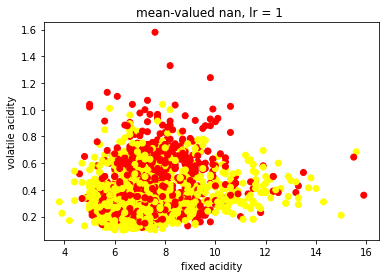

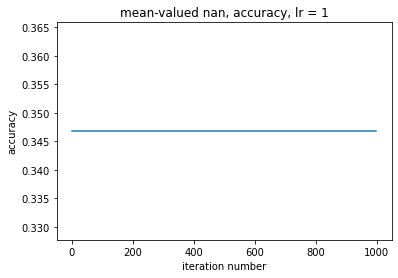

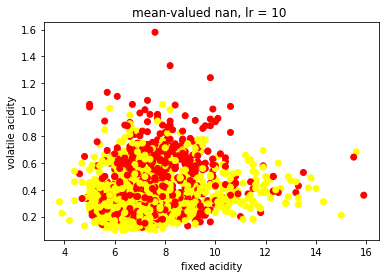

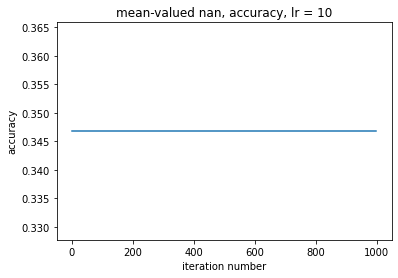

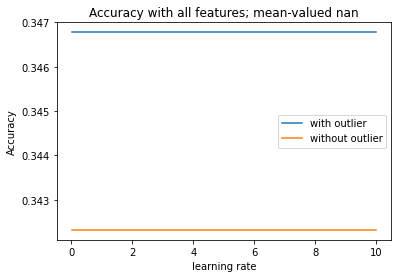

In [433]:
lr = [0.01, 0.1, 1, 10]

# x1
X1 = x1[['fixed acidity', 'volatile acidity']]
# remove outliers
z_scores = stats.zscore(X1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X1_pure = X1[filtered_entries]
y1_pure = y1[filtered_entries]
# Accuracy for all features
list_ = []
list_2 = []
for lr_val in lr:
    # Accuracy, all feature
    model = LogisticRegression(lr_val)
    coef, cost, false = model.fit(x1, y1)
    list_.append(np.round(1 - false[-1], 5))    
    # 2 features
    model = LogisticRegression(lr_val)
    coef, cost, false = model.fit(X1, y1)
    sep_line = np.linspace(np.min(X1), np.max(X1), 50)
    # Plot data + sep laine
    plt.plot(sep_line, (-coef[1]/coef[2]) * sep_line + (-coef[0] / coef[2]), '--b')
    plt.scatter(X1['fixed acidity'], X1['volatile acidity'], color=["yellow" if l==1 else "red" for l in y1])
    plt.title("dropped nan, lr = {} ".format(lr_val))
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.show()
    # Plot accuracy per iter
    plt.title("dropped nan, accuracy, lr = {}".format(lr_val))
    plt.plot(range(1000), 1-false)
    plt.xlabel('iteration number')
    plt.ylabel('accuracy')
    plt.show()
    # Accuracy, all feature with removed outliers
    model = LogisticRegression(lr_val)
    coef, cost, false = model.fit(X1_pure, y1_pure)
    list_2.append(np.round(1 - false[-1], 5))  
    
plt.plot(lr, list_, label="with outlier")
plt.plot(lr, list_2, label="without outlier")
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy with all features; dropped nan')
plt.legend()
plt.show()
    
# x2
X2 = x2[['fixed acidity', 'volatile acidity']]
# remove outliers
z_scores = stats.zscore(X2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X2_pure = X2[filtered_entries]
y2_pure = y2[filtered_entries]
# Accuracy for all features
list_ = []
list_2 = []
for lr_val in lr:
    # Accuracy, all feature
    model = LogisticRegression(lr_val)
    coef, cost, false = model.fit(x2, y2)
    list_.append(np.round(1 - false[-1], 5))
    # 2 features
    model = LogisticRegression(lr_val)
    coef, cost, false = model.fit(X2, y2)
    sep_line = np.linspace(np.min(X2), np.max(X2), 50)
    # Plot data + sep laine
    plt.plot(sep_line, (-coef[1]/coef[2]) * sep_line + (-coef[0] / coef[2]), '--b')
    plt.scatter(X1['fixed acidity'], X1['volatile acidity'], color=["yellow" if l==1 else "red" for l in y1])
    plt.title("mean-valued nan, lr = {} ".format(lr_val))
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    plt.show()
    # Plot accuracy per iter
    plt.title("mean-valued nan, accuracy, lr = {}".format(lr_val))
    plt.plot(range(1000), 1-false)
    plt.xlabel('iteration number')
    plt.ylabel('accuracy')
    plt.show()
    # Accuracy, all feature with removed outliers
    model = LogisticRegression(lr_val)
    coef, cost, false = model.fit(X2_pure, y2_pure)
    list_2.append(np.round(1 - false[-1], 5))

plt.plot(lr, list_, label="with outlier")
plt.plot(lr, list_2, label="without outlier")
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy with all features; mean-valued nan')
plt.legend()
plt.show()

## 3. Online Linear Regression 

In this question you will simulate an online linear regressor.
For more informain refer to the HW description file.

In the code cell below you should prepare your data as introduced in the first part of 'Linear Regression' question.
For convenience, you may load the whole original dataset and do the jobs required from beginning on the original given data in the HW folder or you can use results from previous parts.

In [434]:
dataset_df = pd.read_csv('JuiceQuality.csv')
dataset_df.dropna(inplace=True)
x = dataset_df[['fixed acidity', 'volatile acidity', 'citric acid']][:370]
y = dataset_df['A Indx'][:370]

In the code block below you should write your funcion which is a Gradient Descent optimizer.

In [435]:
def GDO(x, y, lr, iter_num, theta=[5, -5, 5, -5]):
    x = (np.hstack((x, np.ones((x.shape[0], 1)))))
    mse_per_iter = np.zeros(iter_num)
    for i in range(iter_num):
        tmp = np.dot(theta, x.T)
        theta = theta - (lr / len(y)) * np.dot((tmp - y), x)
    mse = np.sum(np.power((y - tmp), 2)) / len(y)
    return theta, mse

Use your Gradient Descent function to find a (w,b) that satisfies the criteria introduced in the HW description file. Please note that you must set initial point for your optimizer at [5,-5,5,-5].

In [436]:
lr = 0.015
iter_num = 10000
theta, mse = GDO(x[:300], y[:300], lr, iter_num)

print('Mean Squrae Error: {}'.format(np.round(mse, 4)))
print('[w*, b*]: {}'.format(theta))
print('Learning Rate: {}'.format(lr))

Mean Squrae Error: 0.0895
[w*, b*]: [2.04997579 0.63785774 2.95957446 0.08124549]
Learning Rate: 0.015


#### REPORT -------------------------------
- Optimal point [w*, b*]: [2.050 0.638 2.960 0.0812]
- Mean squrae error: 0.0895
- learning rate: 0.015
#### ---------------------------------------------

Now, let's go toward SGD! Please writw your code for implementing type 1 SGD (eta-constant type) below.

In [437]:
class SGD1:
    def __init__(self, lr, start_point, initial_mse): 
        self.lr = lr
        self.theta = start_point
        self.mse = initial_mse
        
    def theta_update(self, t_pre, new):
        return (t_pre * self.theta + new) / (t_pre + 1)
    
    def mse_update(self, t_pre, new):
        return (t_pre * self.mse + new) / (t_pre + 1)
    
    def cost(self, x, y):
        return (np.sum(np.power((y - np.dot(self.theta, x.T)), 2)))
    
    def gradient(self, x, y):
        return -x * (y - np.dot(self.theta, x))
    
    def update_theta(self, x, y):
        return self.theta - self.lr * self.gradient(x, y)

    def run(self, x, y):
        x = (np.hstack((x, np.ones((x.shape[0], 1)))))
        for i in range(0, 70):
            x_curr = x[300+i]
            y_curr = y.iloc[300+i]
            theta_new = self.update_theta(x_curr, y_curr)
            self.theta = self.theta_update(i+1, theta_new)
            mse_new = self.cost(x_curr, y_curr)
            self.mse = self.mse_update(i+1, mse_new)
        return self.theta, self.mse
    
    def run2(self, x, y):
        x = (np.hstack((x, np.ones((x.shape[0], 1)))))
        mse_per_iter = np.zeros(70)
        for i in range(0, 70):
            x_curr = x[300+i]
            y_curr = y.iloc[300+i]
            theta_new = self.update_theta(x_curr, y_curr)
            self.theta = self.theta_update(i+1, theta_new)
            mse_new = self.cost(x_curr, y_curr)
            self.mse = self.mse_update(i+1, mse_new)
            mse_per_iter[i] = self.mse
        return mse_per_iter

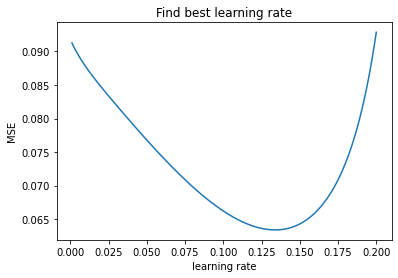

Best learning rate: 0.13455704697986579
Best MSE: 0.06339338592561014
Optimal Coefficients for the best learning rate: [2.04471789 0.64229599 2.95451507 0.08339413]


In [438]:
# Find the best Learning Rate
lr0 = list(np.linspace(0.001, 0.2, 150))
mse_list = list(np.zeros(150))
for iter_, item in enumerate(lr0):
    mdl = SGD1(item, theta, mse)
    a, b = mdl.run(x, y)
    mse_list[iter_] = b
plt.plot(lr0, mse_list)
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.title('Find best learning rate')
plt.show()
lr_opt = lr0[mse_list.index(min(mse_list))]
mse_opt = min(mse_list)
print("Best learning rate: {}".format(lr_opt))
print("Best MSE: {}".format(mse_opt))
mdl = SGD1(lr_opt, theta, mse)
a, b = mdl.run(x, y)
print("Optimal Coefficients for the best learning rate: {}".format(a))

#### REPORT -------------------------------
- Optimal point [w*, b*]: [2.0447 0.6423 2.9545 0.08339]
- Mean squrae error: 0.06339
- learning rate: 0.1345
#### ---------------------------------------------

Please write your code for implementing type 2 SGD (eta-variable type) below.

In [449]:
class SGD2:
    def __init__(self, lr, start_point, initial_mse): 
        self.lr = lr
        self.theta = start_point
        self.mse = initial_mse
        
    def theta_update(self, t_pre, new):
        return (t_pre * self.theta + new) / (t_pre + 1)
    
    def mse_update(self, t_pre, new):
        return (t_pre * self.mse + new) / (t_pre + 1)
    
    def cost(self, x, y):
        return (np.sum(np.power((y - np.dot(self.theta, x.T)), 2)))
    
    def gradient(self, x, y):
        return -x * (y - np.dot(self.theta, x))
    
    def update_theta(self, x, y):
        return self.theta - self.lr * self.gradient(x, y)

    def run(self, x, y):
        x = (np.hstack((x, np.ones((x.shape[0], 1)))))
        for i in range(0, 70):
            x_curr = x[300+i]
            y_curr = y.iloc[300+i]
            theta_new = self.update_theta(x_curr, y_curr)
            self.theta = self.theta_update(i+1, theta_new)
            mse_new = self.cost(x_curr, y_curr)
            self.mse = self.mse_update(i+1, mse_new)
            self.lr = self.lr / np.sqrt(i+1)
        return self.theta, self.mse
    
    def run2(self, x, y):
        mse_per_iter = np.zeros(70)
        x = (np.hstack((x, np.ones((x.shape[0], 1)))))
        for i in range(0, 70):
            x_curr = x[300+i]
            y_curr = y.iloc[300+i]
            theta_new = self.update_theta(x_curr, y_curr)
            self.theta = self.theta_update(i+1, theta_new)
            mse_new = self.cost(x_curr, y_curr)
            self.mse = self.mse_update(i+1, mse_new)
            self.lr = self.lr / np.sqrt(i+1)
            mse_per_iter[i] = self.mse
        return mse_per_iter

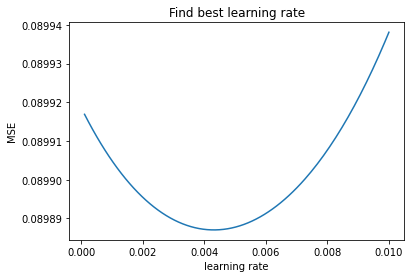

Best learning rate: 0.004285906040268457
Best MSE: 0.08988704615657835
Optimal Coefficients for the best learning rate: [2.05018458 0.63790436 2.95953694 0.08120544]


In [443]:
# Find the best Learning Rate
lr0 = list(np.linspace(0.0001, 0.01, 150))
mse_list = list(np.zeros(150))
for iter_, item in enumerate(lr0):
    mdl = SGD2(item, theta, mse)
    a, b = mdl.run(x, y)
    mse_list[iter_] = b
plt.plot(lr0, mse_list)
plt.xlabel('learning rate')
plt.ylabel('MSE')
plt.title('Find best learning rate')
plt.show()
lr_opt = lr0[mse_list.index(min(mse_list))]
mse_opt = min(mse_list)
print("Best learning rate: {}".format(lr_opt))
print("Best MSE: {}".format(mse_opt))
mdl = SGD2(lr_opt, theta, mse)
a, b = mdl.run(x, y)
print("Optimal Coefficients for the best learning rate: {}".format(a))

#### REPORT -------------------------------
- Optimal point [w*, b*]: [2.05018014 0.63791109 2.95952713 0.08119191]
- Mean squrae error: 0.090
- learning rate: 0.0050
#### ---------------------------------------------

Below, you may provide the plots requested in the last part of the question.

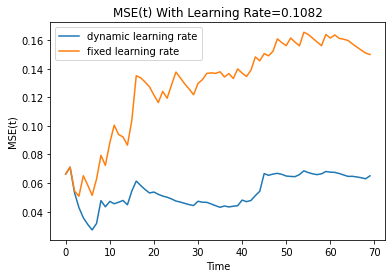

In [451]:
# Find max learning rate
lr0 = list(np.linspace(0.001, 0.2, 300))
mse_list = list(np.zeros(300))
index = 0
for iter_, item in enumerate(lr0):
    mdl1 = SGD1(item, theta, mse)
    a1, b1 = mdl1.run(x, y)
    mdl2 = SGD2(item, theta, mse)
    a2, b2 = mdl2.run(x, y)
    if b1 >= 0.15 or b2 >= 0.15:
        index = iter_ - 1
        break
# Calculate MSE(t)
mdl1 = SGD1(lr0[index], theta, mse)
mse_per_iter1 = mdl1.run2(x, y)
mdl2 = SGD2(lr0[index], theta, mse)
mse_per_iter2 = mdl2.run2(x, y)
# Plot
plt.figure()
plt.plot(mse_per_iter1, label='dynamic learning rate')
plt.plot(mse_per_iter2, label='fixed learning rate')
plt.title('MSE(t) With Learning Rate={}'.format(np.round(lr0[index], 4)))
plt.xlabel('Time')
plt.ylabel('MSE(t)')
plt.legend()
plt.show()

#### REPORT -------------------------------
- Comparison: dynamic learning rate is more reliable and stable and less prone to fluctuate, and it also shows a better performance

- Explanation: Because of a lower learning rate, it does not respond to new incoming data that much and not affected that much, so it is more stable, so the performance is better
#### ---------------------------------------------